# DATA MINING - GRUPPO 2
## Diabets dataset
The aim of this project is to create a model to predict if
a patient will be readmitted or not after a specific encounter.

The first thing is to import the dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
plt.style.use('ggplot')

df = pd.read_csv("dataset_diabetes/diabetic_data.csv", low_memory=False, delimiter=',', na_values='?')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


The dataset contains 101766 records with 50 columns. The columns
are:

In [2]:
print(df.columns.to_list())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


let's unify the '> 30' and 'no' class value

In [3]:
def unify_value(x: pd.Series) -> pd.Series:
    if x['readmitted'] == '>30':
        x['readmitted'] = 'NO'
    return x

df = df.apply(unify_value, axis=1)


Some columns contains null values, in particular

In [4]:
df.isna().apply(lambda x: f'{round((sum(x) / df.shape[0]) * 100, 1)}%')

encounter_id                 0.0%
patient_nbr                  0.0%
race                         2.2%
gender                       0.0%
age                          0.0%
weight                      96.9%
admission_type_id            0.0%
discharge_disposition_id     0.0%
admission_source_id          0.0%
time_in_hospital             0.0%
payer_code                  39.6%
medical_specialty           49.1%
num_lab_procedures           0.0%
num_procedures               0.0%
num_medications              0.0%
number_outpatient            0.0%
number_emergency             0.0%
number_inpatient             0.0%
diag_1                       0.0%
diag_2                       0.4%
diag_3                       1.4%
number_diagnoses             0.0%
max_glu_serum                0.0%
A1Cresult                    0.0%
metformin                    0.0%
repaglinide                  0.0%
nateglinide                  0.0%
chlorpropamide               0.0%
glimepiride                  0.0%
acetohexamide 

Let's check if the 2.2% of null value in race are correlated with the class
label

In [5]:
df[(df['race'].isnull()) & (df['readmitted'] == '<30')].shape[0]

188

There are 188 records with our target class value, so we decide to
maintain them as "not assigned"

In [6]:
df['race'] = df['race'].fillna('not assigned')
df[df['race'] == 'not assigned']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
19,148530,69422211,not assigned,Male,[70-80),NaN,3,6,2,6,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
20,150006,22864131,not assigned,Female,[50-60),NaN,2,1,4,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO
21,150048,21239181,not assigned,Male,[60-70),NaN,2,1,4,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
54,604188,113848434,not assigned,Female,[60-70),NaN,3,1,2,4,...,No,Down,No,No,No,No,No,Ch,Yes,NO
65,713268,58231314,not assigned,Female,[90-100),NaN,2,3,2,8,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101659,442552766,58188375,not assigned,Female,[70-80),NaN,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
101671,442606028,151756061,not assigned,Female,[60-70),NaN,1,3,7,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101702,443186306,38686185,not assigned,Male,[70-80),NaN,1,3,7,5,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101715,443226344,147936164,not assigned,Male,[50-60),NaN,1,6,7,13,...,No,Down,No,No,No,No,No,Ch,Yes,NO


Since "weight", "payer_code", "medical_specialty" have a high percentage of null
value, we can remove them

In [7]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])

There are some ids that are equivalent, so we can unify them

In [8]:
def merge_ids(series: pd.Series) -> pd.Series:
    if series['admission_type_id'] == 5 or series['admission_type_id'] == 6:
        series['admission_type_id'] = 8
    if series['discharge_disposition_id'] == 18 or series['discharge_disposition_id'] == 26:
        series['discharge_disposition_id'] = 25
    if series['admission_source_id'] == 9 or series['admission_source_id'] == 15 or series['admission_source_id'] == 17 or series['admission_source_id'] == 21:
        series['admission_source_id'] = 20
    return series

df = df.apply(merge_ids, axis=1)

Some informations about the column type and the null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

Let's fix the types

In [10]:
for attribute in df.columns:
    if df[attribute].dtype == np.object:
        df[attribute] = df[attribute].astype('category')

df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   admission_type_id         101766 non-null  category
 6   discharge_disposition_id  101766 non-null  category
 7   admission_source_id       101766 non-null  category
 8   time_in_hospital          101766 non-null  int64   
 9   num_lab_procedures        101766 non-null  int64   
 10  num_procedures            101766 non-null  int64   
 11  num_medications           101766 non-null  int64   
 12  number_outpatient         101766 non-null  int64   
 13  number_emergency          101

Since there are two columns with only one possible value, we can drop them

In [11]:
df = df.drop(columns=['examide', 'citoglipton'])

We are not interested in patient number and encounter id

In [12]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])

The most frequent value for the categorical attributes are:

In [13]:
info_columns = df.describe(include='category').T
info_columns

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
admission_type_id,101766,6,1,53990
discharge_disposition_id,101766,25,1,60234
admission_source_id,101766,15,7,57494
diag_1,101745,716,428,6862
diag_2,101408,748,276,6752
diag_3,100343,789,250,11555
max_glu_serum,101766,4,None,96420


We can calculate the percentage of frequency, so we can decide
which columns have a very low or very high variability.

The upper bound is set to 99%

In [14]:
upper_bound = 99
lower_bound = 0

info_columns['freq'] = info_columns['freq'].apply(lambda x: round((x / df.shape[0]) * 100, 1))
for info in info_columns.index:
    if info_columns.loc[info]['freq'] > upper_bound or info_columns.loc[info]['freq'] < lower_bound:
        df = df.drop(columns=[info])

The distribution for the numeric attribute

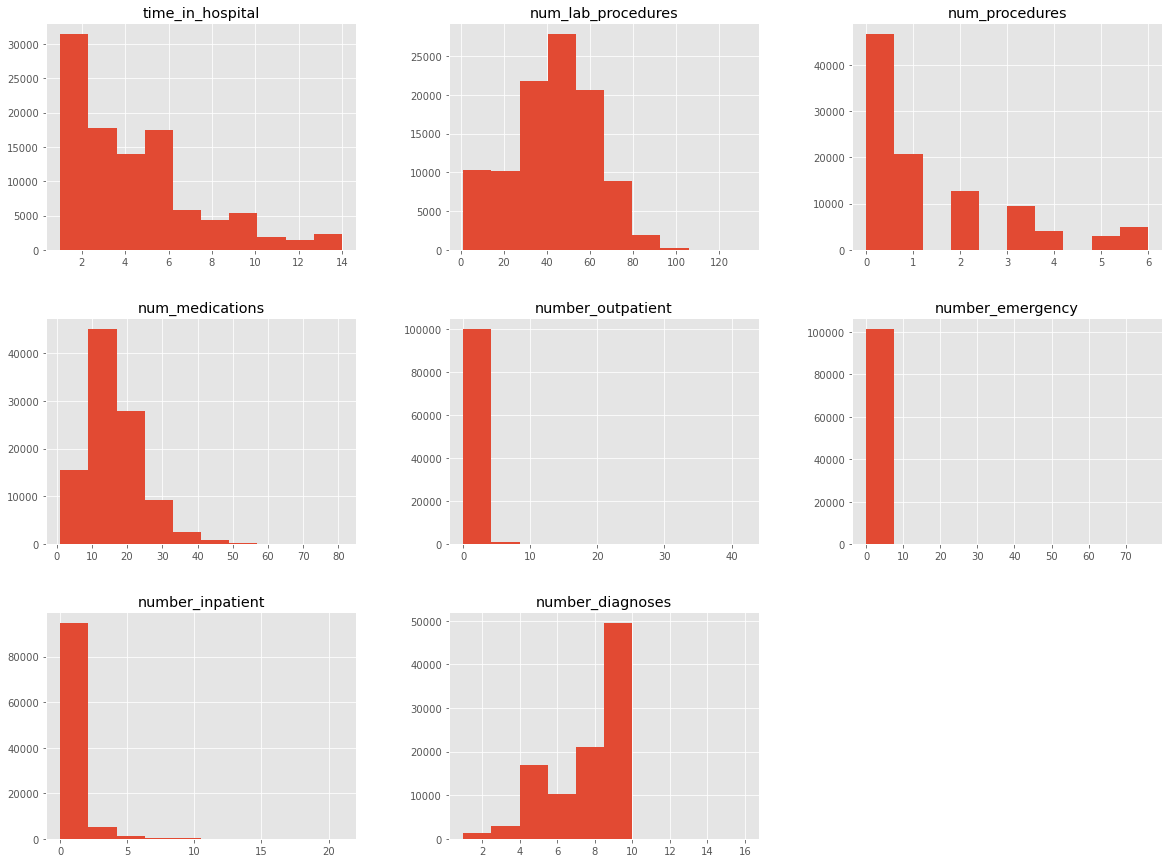

In [15]:
df.select_dtypes(include=['int64']).hist(figsize=(20,15))
plt.show()

About categorical attributes

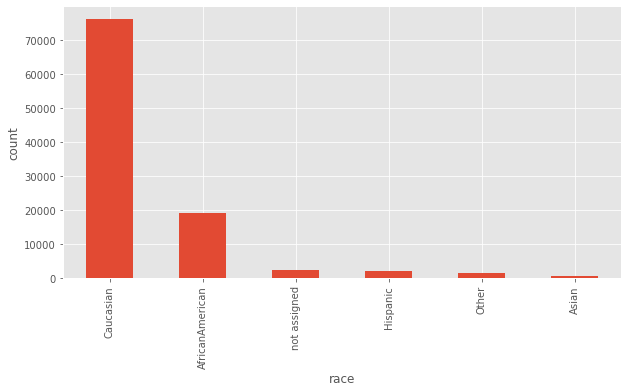

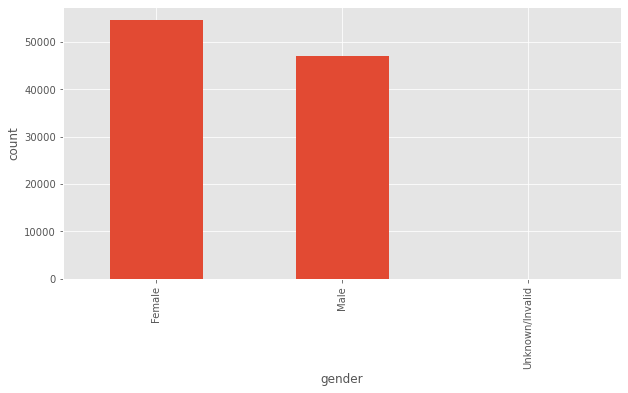

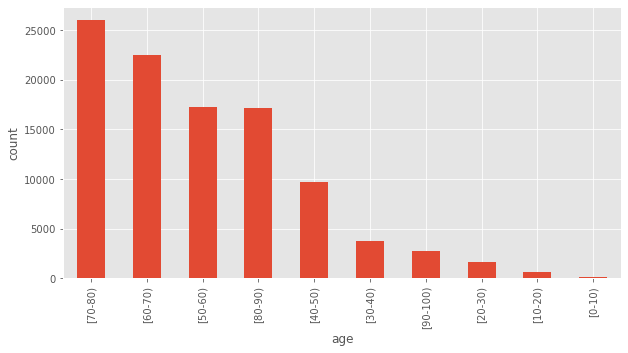

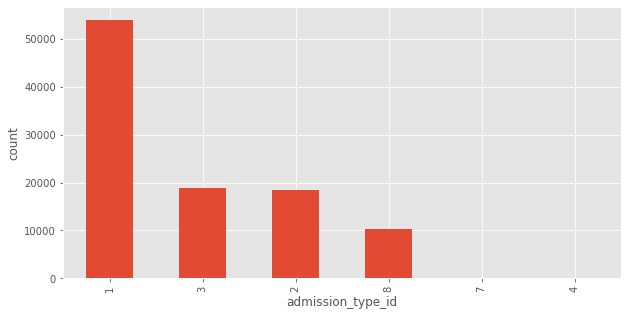

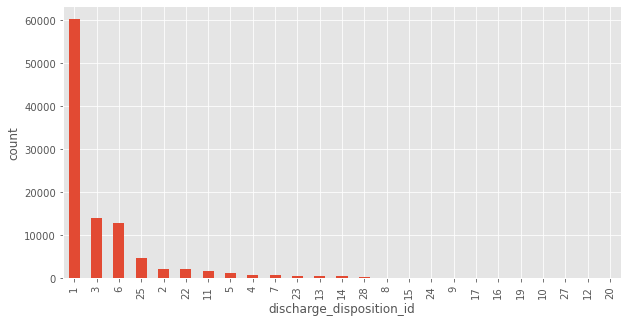

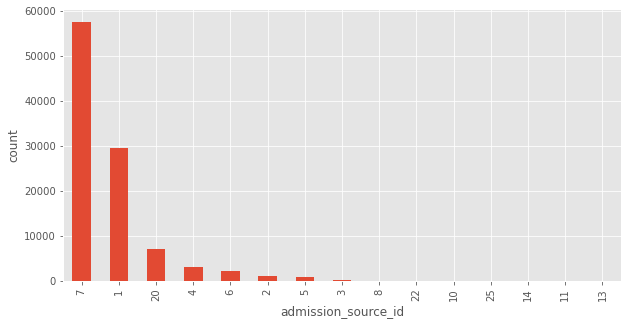

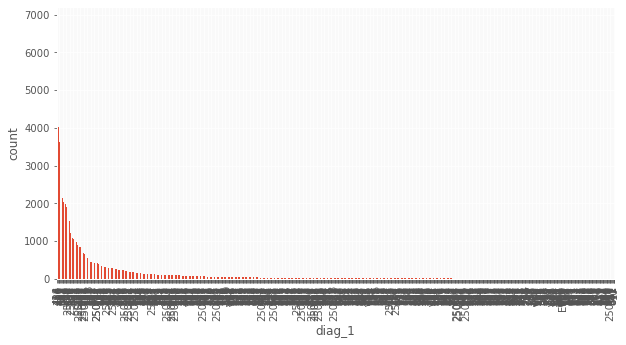

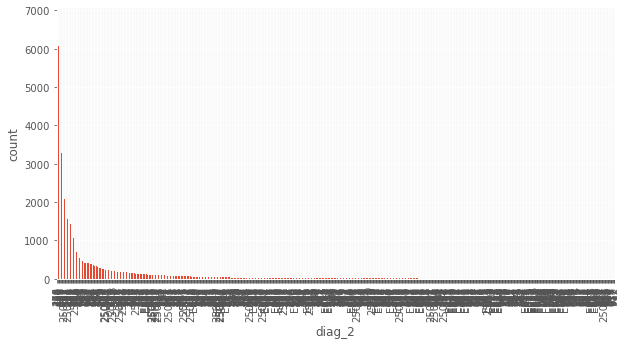

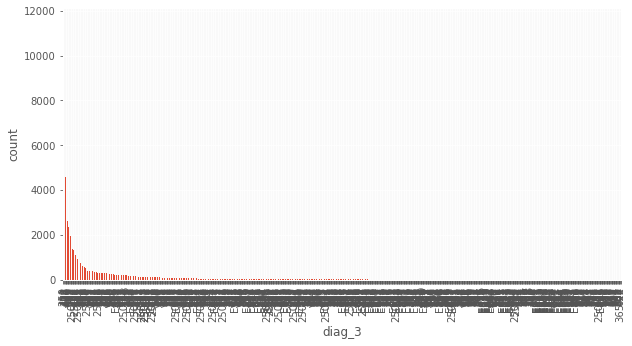

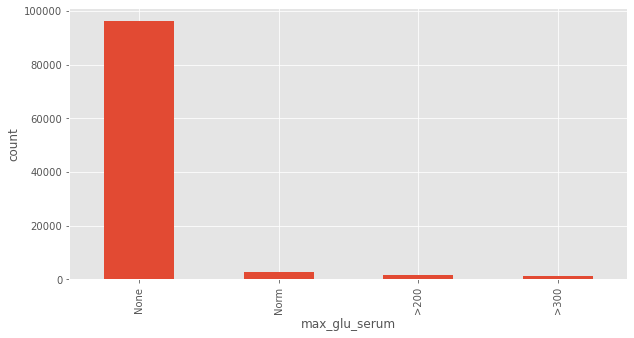

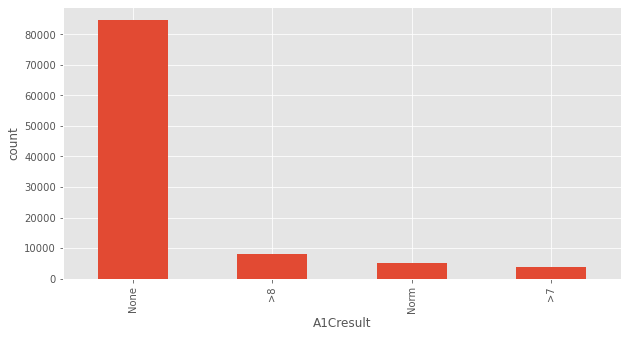

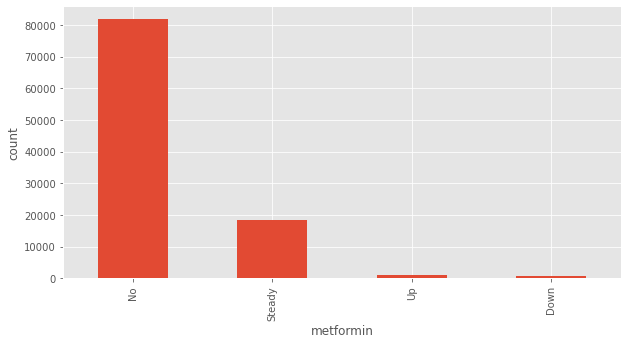

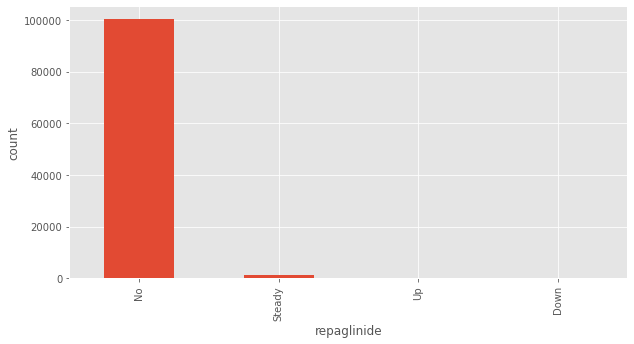

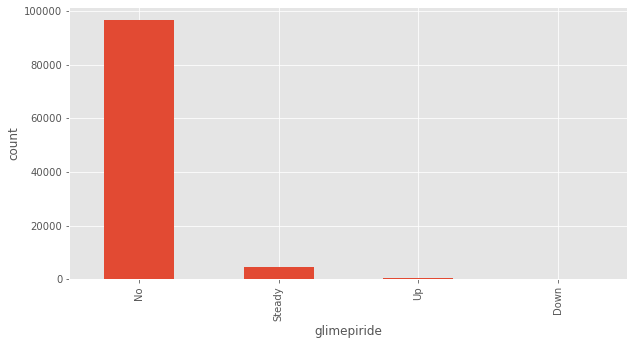

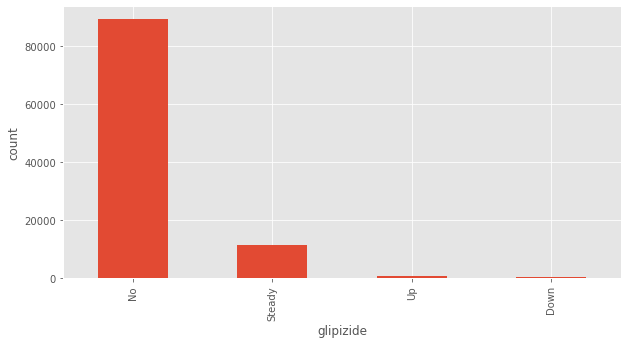

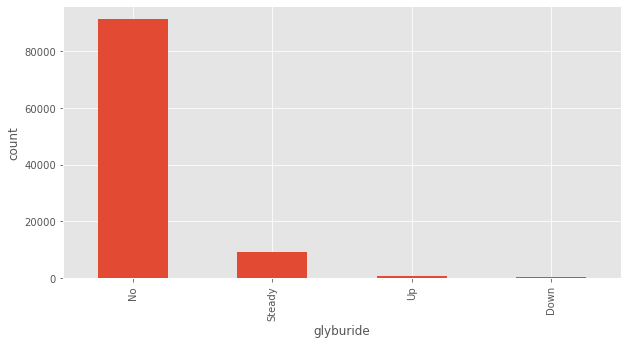

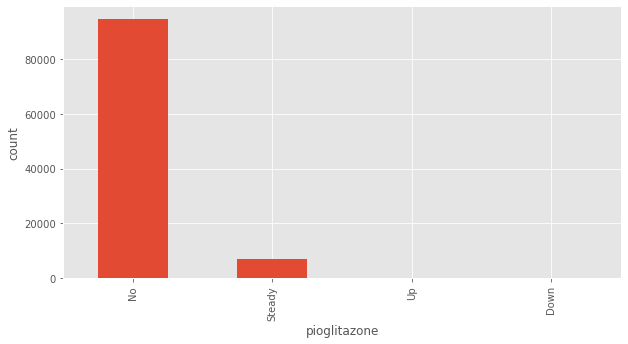

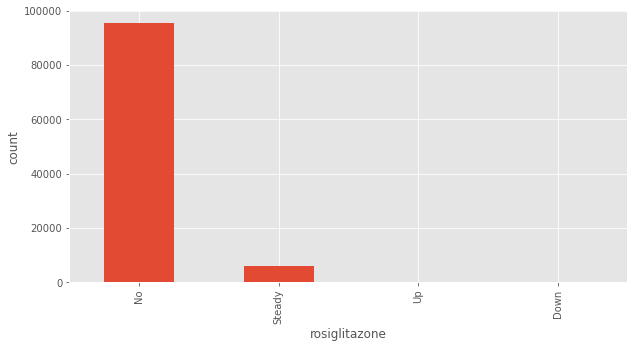

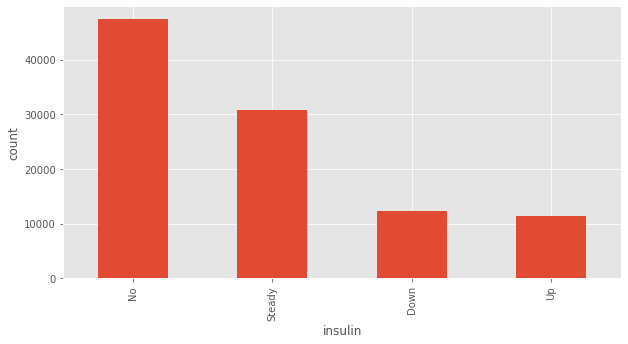

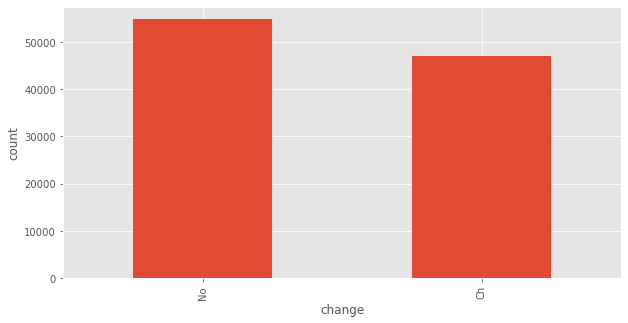

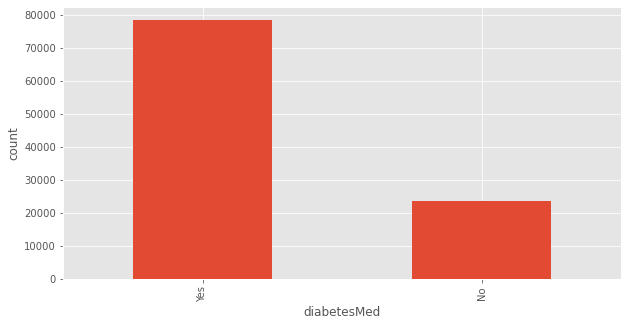

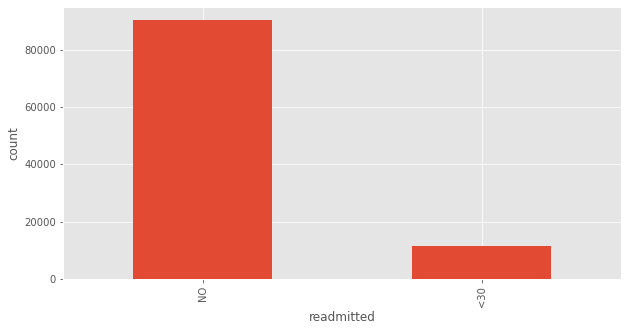

In [16]:
categorical_attr = df.select_dtypes(include=['category']).columns.to_list()
for attribute in categorical_attr:
    val = df[attribute].value_counts()
    val.plot(kind='bar', figsize=(10,5))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

How the numerical feature are correlated with the class labels

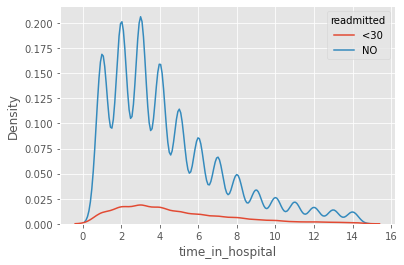

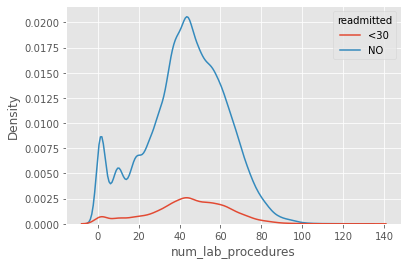

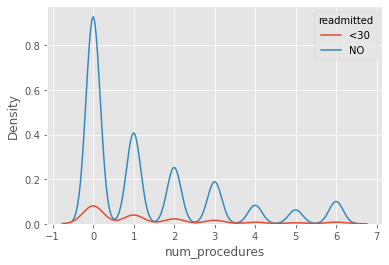

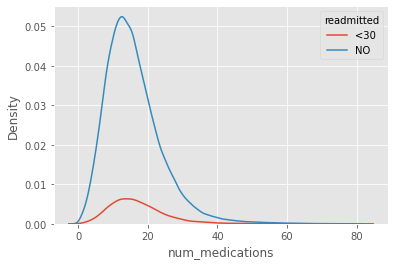

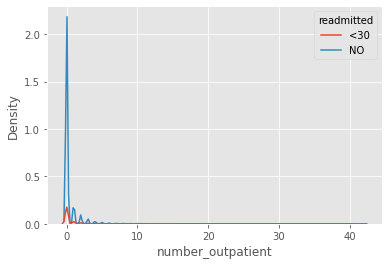

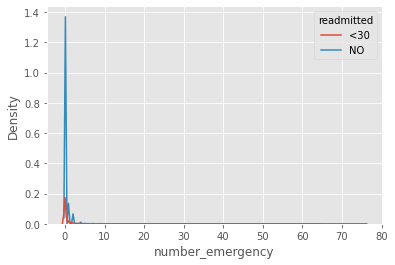

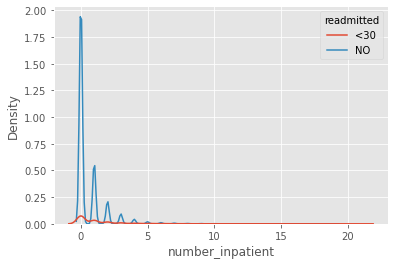

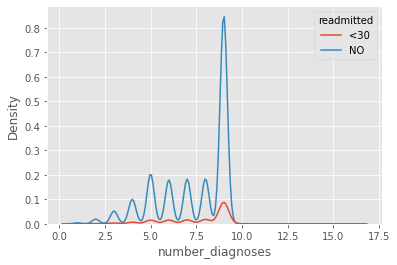

In [17]:
numericAttribute = df.select_dtypes(include=['int64']).columns.to_list()
numericAttribute.append('readmitted')

for attribute in numericAttribute:
    if attribute != 'readmitted':
        sb.kdeplot(x= df[attribute], hue= 'readmitted', data=df[numericAttribute])
        plt.show()


How the categorical feature are correlated with the class labels

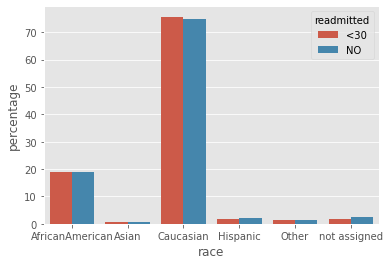

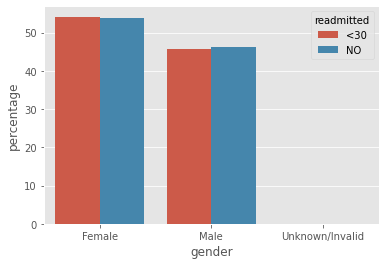

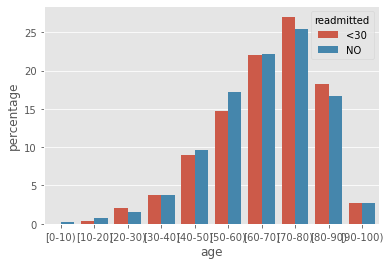

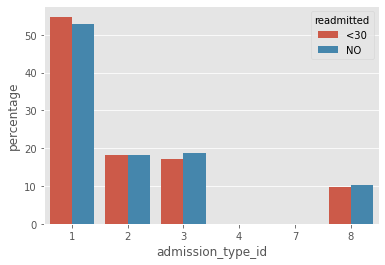

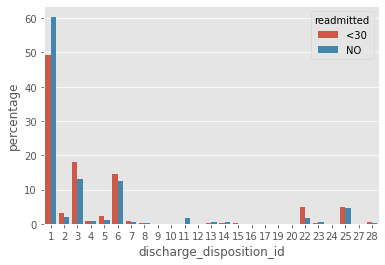

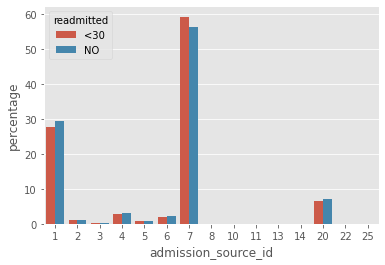

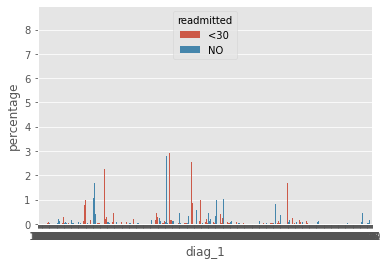

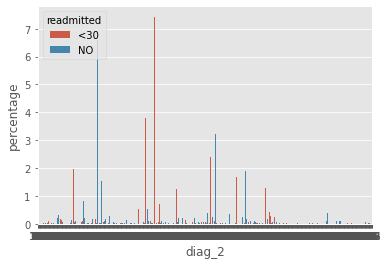

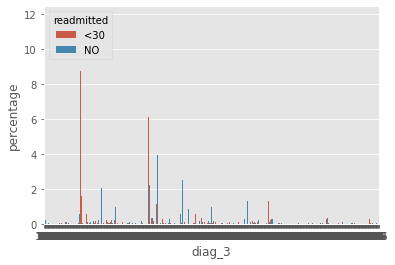

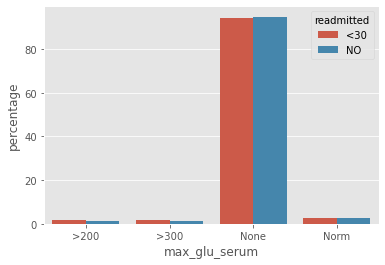

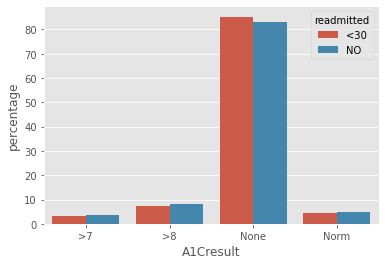

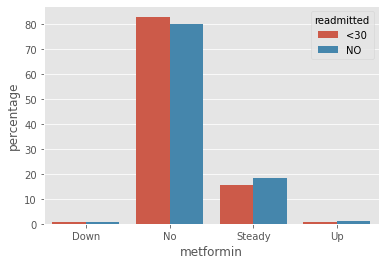

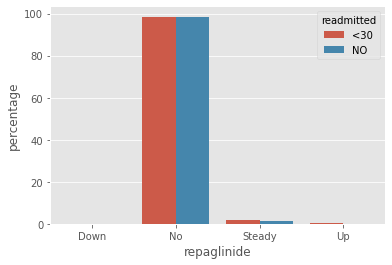

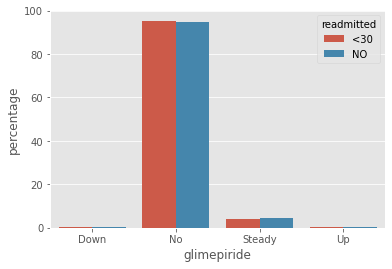

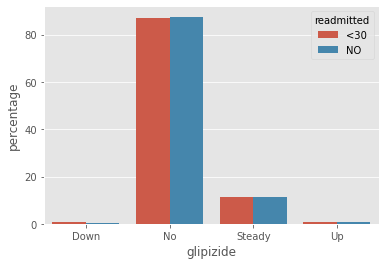

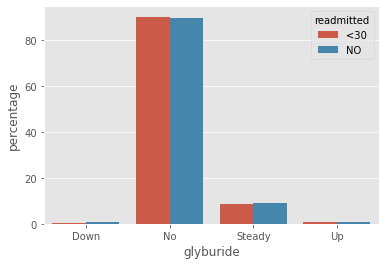

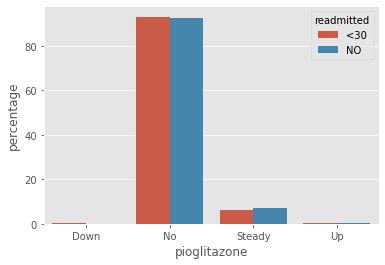

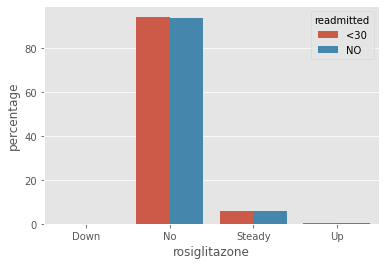

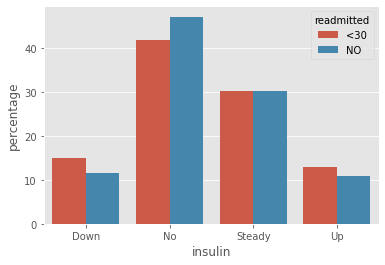

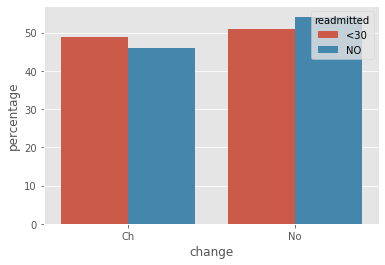

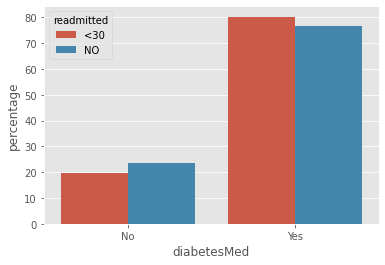

In [18]:
categoricalAttributes = df.select_dtypes(include=['category']).columns.to_list()
categoricalAttributes.append('readmitted')

for attribute in categoricalAttributes:
    if attribute != 'readmitted':
        attributeCounts = (df.groupby(['readmitted'])[attribute]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(attribute))
        p = sb.barplot(x=attribute, y="percentage", hue="readmitted", data=attributeCounts)
        plt.show()

Check the outliers

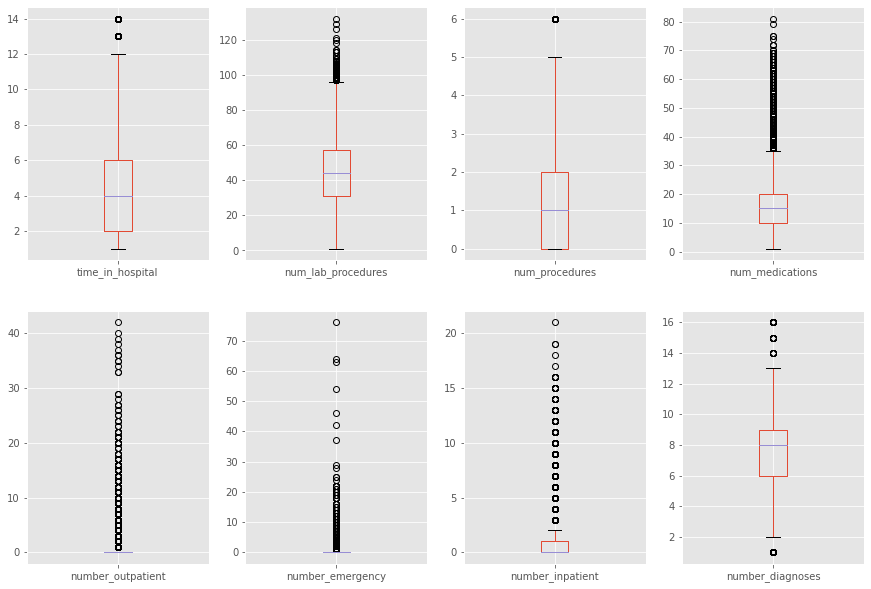

In [19]:
df.select_dtypes(include=['int64']).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 27), layout=(5, 4))
plt.show()

Binarization

In [20]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('readmitted')
cat_attributes.remove('diag_1')
cat_attributes.remove('diag_2')
cat_attributes.remove('diag_3')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('diag_1')
new_attr_list.remove('diag_2')
new_attr_list.remove('diag_3')
new_attr_list.remove('readmitted')
df2 = df2[new_attr_list]

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


#x_train, x_test, y_train, y_test = train_test_split(df2[new_attr_list], df['readmitted'], test_size=0.4, random_state=0)
x = np.array(df2.values)
y = np.array(df['readmitted'].values)

seed = 121
test_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

classifiers = [
    KNeighborsClassifier(3),
    # SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),                Ci mettono davvero troppo con il cross_val, come procediamo?
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier( splitter="random", random_state=1, max_depth=5, max_leaf_nodes=15),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=24),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]
means = []
for classifier in classifiers:
    means.append(cross_val_score(classifier, df2[new_attr_list], df['readmitted']).mean())

means

In [ ]:
a = [0.8650138502420583, None, None, None, 0.8882337912999748,
     0.888391014830745, 0.8882927492187959, 0.8877228130145364,
     0.15160264893462075, 0.13346303180716498]
np.ndarray(a, dtype=np.float)

### **Evaluation**

##### **Do predictions on test set**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
model =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=24)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

In [ ]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [ ]:
categories = ['No', 'Yes']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

In [ ]:
print('Classification report')
print(classification_report(y_test, predictions))
